scipy.interpolate.lagrange

https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.lagrange.html

Interpolate  $f(x)= x^3$ by 3 points.

In [1]:
import numpy as np
from scipy.interpolate import lagrange

x = np.array([0, 1, 2])
y = x**3
poly = lagrange(x, y)

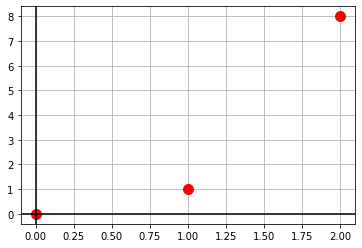

In [2]:
import matplotlib.pyplot as plt

plt.plot(x,y,'r.',ms=20)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.grid(True, which='both')
plt.show()

In [3]:
poly

poly1d([ 3., -2.,  0.])

numpy.poly1 - A one-dimensional polynomial class.

https://numpy.org/doc/stable/reference/generated/numpy.poly1d.html



In [4]:
poly.coef

array([ 3., -2.,  0.])

In [5]:
print(poly)

   2
3 x - 2 x


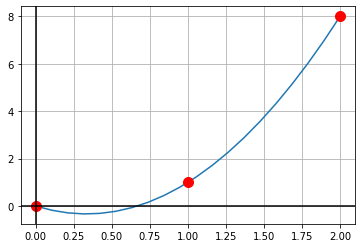

In [6]:
xs = np.linspace(0,2,20)
ys = poly(xs)
plt.plot(xs,ys,x,y,'r.',ms=20)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.grid(True, which='both')
plt.show()

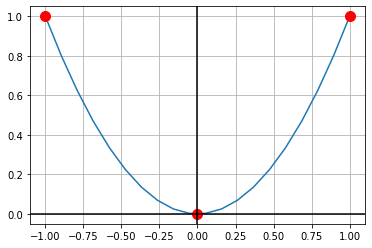

array([1., 0., 0.])

In [7]:
x = np.array([-1, 0, 1])
y = x**2
poly = lagrange(x, y)
xs = np.linspace(-1,1,20)
ys = poly(xs)
plt.plot(xs,ys,x,y,'r.',ms=20)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.grid(True, which='both')
plt.show()
poly.coef

For the 10 points with $y$ random
$$
\begin{array} {l}
(x_0,y_0)=(0,randint(0,10,N))\\
(x_1,y_1)=(1,randint(0,10,N)) \\
(x_2,y_1)=(2,randint(0,10,N)) \\
\vdots\\
(x_9,y_9)=(9,randint(0,10,N))\\
(x_{10},y_{10})=(10,randint(0,10,N))
\end{array}$$

# A sympy-based Lagrange polynomial constructor

https://gist.github.com/folkertdev/084c53887c49a6248839

In [24]:
"""
A sympy-based Lagrange polynomial constructor. 
Given a set of function inputs and outputs, the lagrangePolynomial function will construct an 
expression that for every input gives the corresponding output. For intermediate values,
the polynomial interpolates (giving varying results based on the shape of your input). 
This is useful when the result needs to be used outside of Python, because the 
expression can easily be copied. To convert the expression to a python function object,
use sympy.lambdify.
"""
from sympy import symbols, expand, lambdify, solve_poly_system, tan, E

import math

from operator import mul
from functools import reduce, lru_cache
from itertools import chain

# sympy symbols
x = symbols('x')

# convenience functions
product = lambda *args: reduce(mul, *(list(args) + [1]))

# test data
labels = [(-3/2), (-3/4), 0, 3/4, 3/2]
points = [math.tan(v) for v in labels]

# this product may be reusable (when creating many functions on the same domain)
# therefore, cache the result
@lru_cache(16)
def l(labels, j):
	def gen(labels, j):
		k = len(labels)
		current = labels[j]
		for m in labels:
			if m == current:
				continue
			yield (x - m) / (current - m)
	return expand(product(gen(labels, j)))


def lagrangePolynomial(xs, ys):
	# based on https://en.wikipedia.org/wiki/Lagrange_polynomial#Example_1
	k = len(xs)
	total = 0

	# use tuple, needs to be hashable to cache
	xs = tuple(xs)

	for j, current in enumerate(ys):
		t = current * l(xs, j)
		total += t

	return total




def x_intersections(function, *args):
	"Finds all x for which function(x) = 0"
	# solve_poly_system seems more efficient than solve for larger expressions
	return [var for var in chain.from_iterable(solve_poly_system([function], *args)) if (var.is_real)]

def x_scale(function, factor):
	"Scale function on the x-axis"
	return functions.subs(x, x / factor)

# test data
labels = [1/3, 1/4, 1]
points = [2,-1,7]

func = lagrangePolynomial(labels, points)

pyfunc = lambdify(x, func)
for a, b in zip(labels, points):
    	assert(pyfunc(a) - b < 1e-6)

func


-38.0*x**2 + 58.1666666666667*x - 13.1666666666667

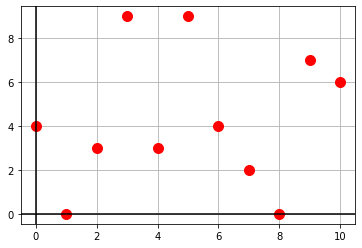

array([4, 0, 3, 9, 3, 9, 4, 2, 0, 7, 6])

In [8]:
import numpy as np
import matplotlib.pyplot as plt
N = 10+1
x = np.arange(0,N)
y = np.random.randint(0,10,N)
plt.plot(x,y,'r.',ms=20)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.grid(True, which='both')
plt.show()
y

In [9]:
from scipy.interpolate import lagrange
poly = lagrange(x, y)
a = poly.coef
a

array([-5.62996032e-04,  2.84846230e-02, -6.18427579e-01,  7.52720734e+00,
       -5.62773090e+01,  2.66061024e+02, -7.87745288e+02,  1.39003566e+03,
       -1.30135841e+03,  4.78347619e+02,  4.00000000e+00])

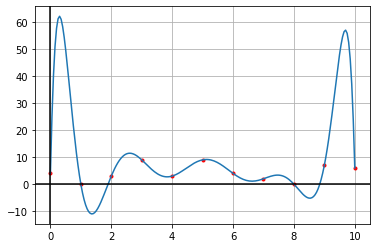

In [10]:
xs = np.linspace(0,N-1,200)
ys = sum([a[N-k-1]*xs**k for k in range(0,N)])
plt.plot(x,y,'r.',xs,ys)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.grid(True, which='both')
plt.show()

Python Program for Lagrange Interpolation Method (with Output)

https://www.codesansar.com/numerical-methods/python-program-lagrange-interpolation-method.htm

In [11]:
# Lagrange Interpolation

import numpy as np
N = 10+1
x = np.arange(0,N)
y = np.array([3, 5, 8, 8, 1, 0, 6, 9, 6, 0, 3])

# Set interpolated value initially to zero
yp = 0

xp = 4.5

n=N
# Implementing Lagrange Interpolation
for i in range(n):
    
    p = 1
    
    for j in range(n):
        if i != j:
            p = p * (xp - x[j])/(x[i] - x[j])
    
    yp = yp + p * y[i]    

# Displaying output
print('Interpolated value at %.3f is %.3f.' % (xp, yp))

Interpolated value at 4.500 is -0.760.


In [16]:
### original code

# Lagrange Interpolation

# Importing NumPy Library
import numpy as np

# Reading number of unknowns
n = int(input('Enter number of data points: '))

# Making numpy array of n & n x n size and initializing 
# to zero for storing x and y value along with differences of y
x = np.zeros((n))
y = np.zeros((n))


# Reading data points
print('Enter data for x and y: ')
for i in range(n):
    x[i] = float(input( 'x['+str(i)+']='))
    y[i] = float(input( 'y['+str(i)+']='))


# Reading interpolation point
xp = float(input('Enter interpolation point: '))

# Set interpolated value initially to zero
yp = 0

# Implementing Lagrange Interpolation
for i in range(n):
    
    p = 1
    
    for j in range(n):
        if i != j:
            p = p * (xp - x[j])/(x[i] - x[j])
    
    yp = yp + p * y[i]    

# Displaying output
print('Interpolated value at %.3f is %.3f.' % (xp, yp))

Enter number of data points: 3
Enter data for x and y: 
x[0]=0.333333333
y[0]=2
x[1]=0.25
y[1]=-1
x[2]=7
y[2]=7
Enter interpolation point: 5
Interpolated value at 5.000 is 54.241.


Power Series (numpy.polynomial.polynomial) 

https://numpy.org/doc/stable/reference/routines.polynomials.polynomial.html

POLYNOMIALS with NUMPY

https://www.yu.edu/sites/default/files/inline-files/Lec12_PDF.pdf